In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

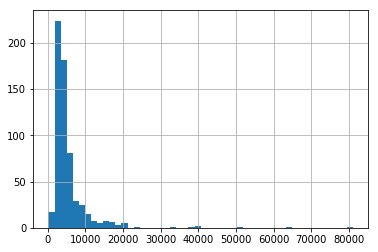

In [7]:
data['ApplicantIncome'].hist(bins=50)

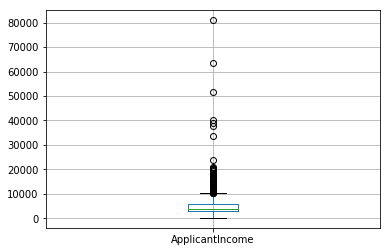

In [8]:
data.boxplot(column='ApplicantIncome')

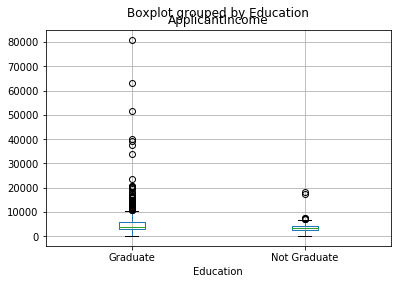

In [9]:
data.boxplot(column='ApplicantIncome', by = 'Education')

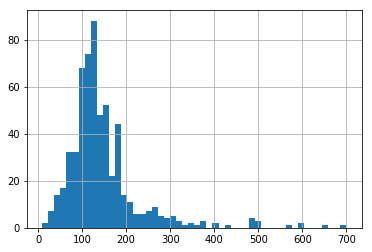

In [10]:
data['LoanAmount'].hist(bins=50)

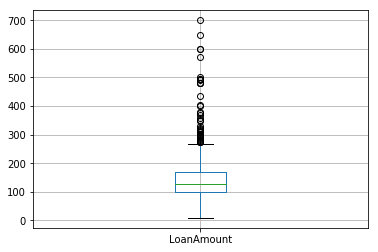

In [11]:
data.boxplot(column='LoanAmount')

In [12]:
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


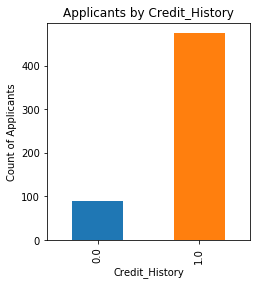

In [14]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan by credit history')

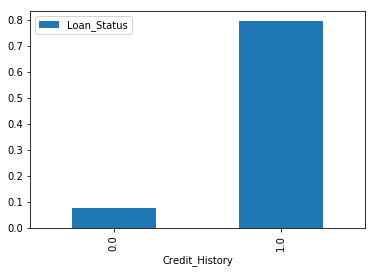

In [15]:
ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

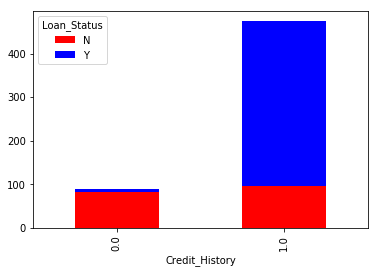

In [16]:
temp3 = pd.crosstab(data['Credit_History'], data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [17]:
temp4 = data.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print ('\nProbility of getting loan for each Gender class:')
print (temp4)


Probility of getting loan for each Gender class:
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


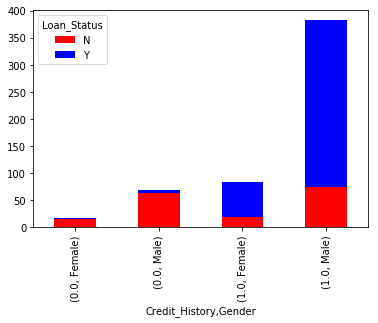

In [18]:
temp5 = pd.crosstab([data['Credit_History'], data['Gender']], data['Loan_Status'])
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [19]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

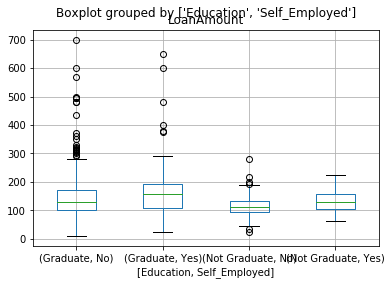

In [20]:
data.boxplot(column='LoanAmount', by=['Education', 'Self_Employed'])

In [21]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
data['Self_Employed'].fillna('No', inplace=True)

In [23]:
table = data.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [24]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [25]:
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [26]:
sum(data['LoanAmount'].notnull())

614

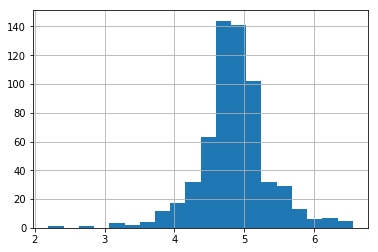

In [27]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

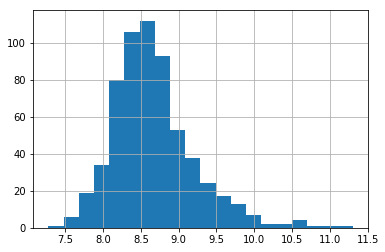

In [28]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20)

In [29]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [30]:
#convert all our categorical variables into numeric
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5).split(range(data.shape[0]))
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [40]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [42]:
predictor_var = ['Credit_History']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [47]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [48]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.046%


In [50]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.854%


In [51]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.273413
Credit_History      0.268209
LoanAmount_log      0.220170
Dependents          0.052063
Property_Area       0.049181
Loan_Amount_Term    0.043726
Married             0.025372
Self_Employed       0.023345
Education           0.022934
Gender              0.021586
dtype: float64


In [55]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 82.736%
Cross-Validation Score : 80.295%
